<a href="https://colab.research.google.com/github/Anand0111/MLInfidata/blob/main/FlightFarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# importing libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# importing machine learning libraries
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [12]:
import pandas as pd
data=pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
def To_Datetime(column):
    data[column] = pd.to_datetime(data[column])
    return data[column]

In [14]:
To_Datetime('Date_of_Journey')
To_Datetime('Dep_Time')
To_Datetime('Arrival_Time')

0       2021-03-22 01:10:00
1       2021-10-11 13:15:00
2       2021-06-10 04:25:00
3       2021-10-11 23:30:00
4       2021-10-11 21:35:00
                ...        
10678   2021-10-11 22:25:00
10679   2021-10-11 23:20:00
10680   2021-10-11 11:20:00
10681   2021-10-11 14:10:00
10682   2021-10-11 19:15:00
Name: Arrival_Time, Length: 10683, dtype: datetime64[ns]

In [15]:
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month

data['Dep_hour'] = data['Dep_Time'].dt.hour
data['Dep_minute'] = data['Dep_Time'].dt.minute

data['Arrival_hour'] = data['Arrival_Time'].dt.hour
data['Arrival_minute'] = data['Arrival_Time'].dt.minute

data.drop('Date_of_Journey',axis=1,inplace=True)
data.drop('Dep_Time',axis=1,inplace=True)
data.drop('Arrival_Time',axis=1,inplace=True)

In [16]:
data['Duration'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [17]:
data[data['Additional_Info']=='No Info']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
795,IndiGo,Banglore,New Delhi,BLR → HYD → DEL,295,1 stop,No Info,8153,3,1,16,55,21,50
2212,IndiGo,Banglore,New Delhi,BLR → HYD → DEL,260,1 stop,No Info,7917,3,1,16,15,20,35
9220,IndiGo,Banglore,New Delhi,BLR → HYD → DEL,285,1 stop,No Info,8064,3,1,5,15,10,0


In [18]:
data.at[[795,2212,9220],'Additional_Info'] = 'No info'

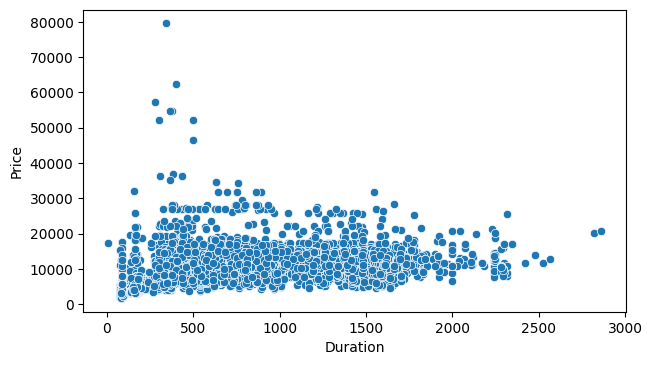

In [19]:
# let's visualize the duration and price relationship
plt.figure(figsize=(7,4),dpi=100)
sns.scatterplot(x='Duration',y='Price',data=data);

In [20]:
data.isna().sum()
data[data['Route'].isna()]
data = data.dropna()
data.describe().T
data[data['Duration']==5]
data = data.drop(index=6474,axis=0)
data.describe().T
data_copy = data.copy()
total_dict = {'non-stop':0,
              '1 stop':1,
              '2 stops':2,
              '3 stops':3,
              '4 stops':4}

data_copy['Total_Stops'] = data_copy['Total_Stops'].map(total_dict)
data_copy.head()
data_copy['Additional_Info'].unique()
data_copy['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXZ → MAA → BLR       1
BOM → DED → DEL → HYD       1
BOM → RPR → VTZ → HYD       1
CCU → RPR → HYD → BLR       1
BOM → UDR → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [21]:
data_copy['Route_A'] = data_copy['Route'].str.split('→').str[0]
data_copy['Route_B'] = data_copy['Route'].str.split('→').str[1]
data_copy['Route_C'] = data_copy['Route'].str.split('→').str[2]
data_copy['Route_D'] = data_copy['Route'].str.split('→').str[3]
data_copy['Route_E'] = data_copy['Route'].str.split('→').str[4]

In [22]:
for i in ['Route_A','Route_B','Route_C','Route_D','Route_E']:
    data_copy[i] = data_copy[i].fillna('None')
    le = LabelEncoder()

for i in ['Route_A','Route_B','Route_C','Route_D','Route_E']:
    data_copy[i] = le.fit_transform(data_copy[i])

In [23]:
data_copy['Airline'] = le.fit_transform(data_copy['Airline'])

In [24]:
data_copy.drop('Route',axis=1,inplace=True)


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_A,Route_B,Route_C,Route_D,Route_E
0,3,Banglore,New Delhi,170,0,No info,3897,24,3,22,20,1,10,0,13,29,13,5
1,1,Kolkata,Banglore,445,2,No info,7662,5,1,5,50,13,15,2,25,1,3,5
2,4,Delhi,Cochin,1140,2,No info,13882,6,9,9,25,4,25,3,32,4,5,5
3,3,Kolkata,Banglore,325,1,No info,6218,5,12,18,5,23,30,2,34,3,13,5
4,3,Banglore,New Delhi,285,1,No info,13302,3,1,16,50,21,35,0,34,8,13,5


In [25]:
object_df = data_copy.select_dtypes(include='object')
numeric_df = data_copy.select_dtypes(exclude='object')

In [26]:
object_df_dummies = pd.get_dummies(object_df,drop_first=True)

In [29]:
final_df = pd.concat([numeric_df,object_df_dummies],axis=1)
X = final_df.drop('Price',axis=1)
y = final_df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

mae is  635.5164292257423
rmse is  1682.4791212090367
r2_score is  0.8659166331699856


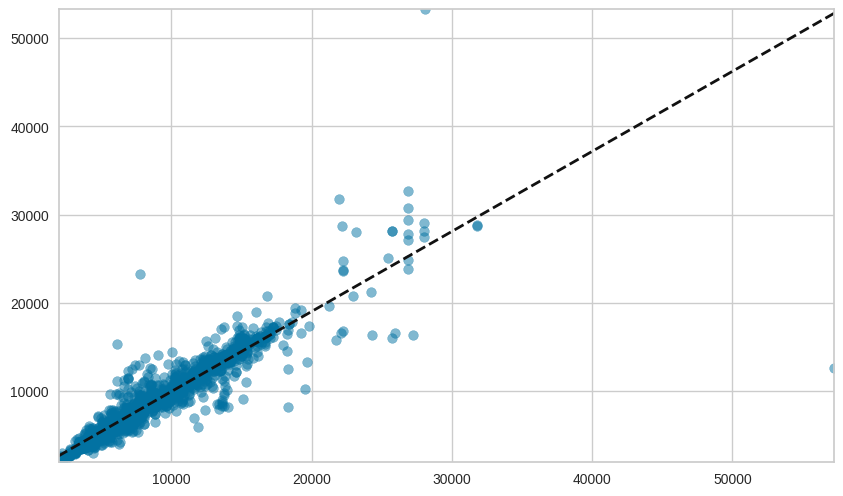

In [33]:
def pred_eval(model):
    y_pred = model.predict(X_test)
    print('mae is ',mean_absolute_error(y_test,y_pred))
    print('rmse is ',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2_score is ',r2_score(y_test,y_pred))
    plt.figure(figsize=(10,6),dpi=100)
    visualizer = PredictionError(model,alpha=0.5)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    
from yellowbrick.regressor import PredictionError
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
pred_eval(rf_model)